<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simulation-ev-n-ment-discret/blob/main/G%C3%A9n%C3%A9rateur2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
from numpy.random import rand

Objectif: générer des valeurs aléatoires suivant la loi uniforme sur $\left[a,b\right]$

On génère des valeurs aléatoires suivant $U\left[0,1\right]$

In [205]:
U01=rand(10)

In [206]:
def rand_a_b(a,b,nombre_points):
  U_0_1=rand(nombre_points)
  U_a_b=(b-a)*U_0_1+a
  return U_a_b

In [207]:
rand_a_b(5,6,10)

array([5.31342418, 5.69232262, 5.87638915, 5.89460666, 5.08504421,
       5.03905478, 5.16983042, 5.8781425 , 5.09834683, 5.42110763])

In [208]:
X_i=np.array([-1,2,3,5,6])
P_xi=np.array([0.15,0.20,0.10,0.30,0.25])
F_xi=np.cumsum(P_xi)
u=rand(5)

In [209]:
F_xi,u,X_i

(array([0.15, 0.35, 0.45, 0.75, 1.  ]),
 array([0.95788953, 0.53316528, 0.69187711, 0.31551563, 0.68650093]),
 array([-1,  2,  3,  5,  6]))

In [210]:
#Exemple 2
#u=float(input("Entrez la valeur de seuil distribuer sur [0,1]:"))
for index in range(len(X_i)):
  if F_xi[index]>u[index]:
    print(X_i[index])
    

5
6


In [211]:
def inverse_tranformation(X_i,P_xi):
    np.random.seed(1)
    F_xi=np.cumsum(P_xi)
    Seuil_alea={}
    Unifor=rand(len(X_i))
    for seuil in Unifor:
      np.random.seed(1)
      for index1 in range(len(X_i)):
        if F_xi[index1]>=seuil:
          Seuil_alea[seuil]=X_i[index1]
          #print(str(index)+":"+str(u[index]))
          break
    return Seuil_alea



In [212]:
inverse_tranformation(X_i,P_xi)

{0.00011437481734488664: -1,
 0.14675589081711304: -1,
 0.30233257263183977: 2,
 0.417022004702574: 3,
 0.7203244934421581: 5}

In [213]:
f=lambda x:60*x**3*(1-x)**2

In [214]:
def acceptation_rejet(f,a,b,nbre_valeur_a_generer):
  X=[]
  y=rand(nbre_valeur_a_generer)
  x=np.linspace(a,b,nbre_valeur_a_generer*10000)
  h=max(f(x))
  x_max=x[list(f(x)).index(max(f(x)))]
  print("Le point où f atteint son max:",x_max)
  u=rand(nbre_valeur_a_generer)

  for i in range(nbre_valeur_a_generer):
    if u[i]<f(y)[i]/h:
      X.append(y)
    else:
      c=0
      while (c<int(h) and u[i]<f(y)[i]/h):
        acceptation_rejet(f,a,b,nbre_valeur_a_generer)
        c=c+1
  return X[0]



In [215]:
f=lambda x:60*x**3*(1-x)**2
f=lambda x:1/3

In [216]:
def T(x):
  f=[]
  for x_i in x:
    if x_i>=0 and x_i<=1:
      t=lambda y:y
      f.append(t(x_i))
    elif x_i>1 and x_i<=2:
      t=lambda y:2-y
      f.append(t(x_i))
  return f


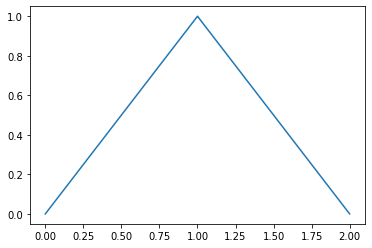

In [217]:
import matplotlib.pyplot as plt

x=np.linspace(0,2,10000)
plt.plot(x,T(x))

In [218]:
acceptation_rejet(T,0,2,3)

Le point où f atteint son max: 0.9999666655555185


array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

In [230]:
def j(x):
  f=[]
  for x_i in x:
    if x_i>=0 and x_i<=2:
      t=lambda y:y/4
      f.append(t(x_i))
    elif x_i>2 and x_i<=4:
      t=lambda y:1-y/4
      f.append(t(x_i))
    else:
      f.append(0)
  return f


In [233]:
acceptation_rejet(j,0,4,15)

Le point où f atteint son max: 1.9999866665777772


array([0.61995572, 0.8289809 , 0.15679139, 0.0185762 , 0.07002214,
       0.48634511, 0.60632946, 0.56885144, 0.31736241, 0.98861615,
       0.57974522, 0.38014117, 0.55094822, 0.74533443, 0.66923289])